In [45]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure



%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Almas\Downloads\movies.csv')

In [4]:
#Lets Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Lets Check if any Data Cleaning needed in here
#Lets loop for checking any NaN Values
for col in df.columns:
    a=df[[col]].isnull().sum()
    print('{}  --- {}'.format(col,a))

name  --- name    0
dtype: int64
rating  --- rating    77
dtype: int64
genre  --- genre    0
dtype: int64
year  --- year    0
dtype: int64
released  --- released    2
dtype: int64
score  --- score    3
dtype: int64
votes  --- votes    3
dtype: int64
director  --- director    0
dtype: int64
writer  --- writer    3
dtype: int64
star  --- star    1
dtype: int64
country  --- country    3
dtype: int64
budget  --- budget    2171
dtype: int64
gross  --- gross    189
dtype: int64
company  --- company    17
dtype: int64
runtime  --- runtime    4
dtype: int64




There are Nan Values in few Columns Of Our DataFrame,we can drop the Nan Values, However we may replace some nan
We may not need the Films whose budget is not defined,lets drop the nan in budget column. 

In [6]:
#Lets drop those movies that have neither budget nor gross defined
#and also drop movie whose company,runtime and country are not defined
df = df.dropna(subset=['budget','gross','company','country','runtime'])

In [7]:
#Lets check once again for Nan

for col in df.columns:
    a=df[[col]].isnull().sum()
    print('{}  --- {}'.format(col,a))

name  --- name    0
dtype: int64
rating  --- rating    11
dtype: int64
genre  --- genre    0
dtype: int64
year  --- year    0
dtype: int64
released  --- released    0
dtype: int64
score  --- score    0
dtype: int64
votes  --- votes    0
dtype: int64
director  --- director    0
dtype: int64
writer  --- writer    0
dtype: int64
star  --- star    0
dtype: int64
country  --- country    0
dtype: int64
budget  --- budget    0
dtype: int64
gross  --- gross    0
dtype: int64
company  --- company    0
dtype: int64
runtime  --- runtime    0
dtype: int64


This looks good,now we only left with  Nan values in rating column,we can replace them with some standard values 

In [8]:

#Lets check unique values of rating column
df.rating.unique()


array(['R', 'PG', 'G', 'NC-17', 'Approved', 'Not Rated', 'PG-13', nan,
       'Unrated', 'X', 'TV-MA'], dtype=object)


We can replace Nan in Rating with 'Not Rated'

In [9]:

import warnings
warnings.filterwarnings("ignore")


In [10]:
#lets replace nan in rating column
df['rating'] = df['rating'].replace(np.nan,'Not Rated')

In [11]:
#Now lets check again for any nan values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


Now the dataframe is really clean we can move forward

In [12]:
#Lets look at our data types of dataframe
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
#Lets keep budget, votes, runtime, gross datatypes as int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [14]:
#Creating a new Year Column that actually matches with the release date
df['yearcorrect'] = df['released'].astype(str).str[-20:-16]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [15]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,", 19"
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,ay 1
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982
2417,Madadayo,Not Rated,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,ril


Text(0.5, 1.0, 'Budget vs Gross')

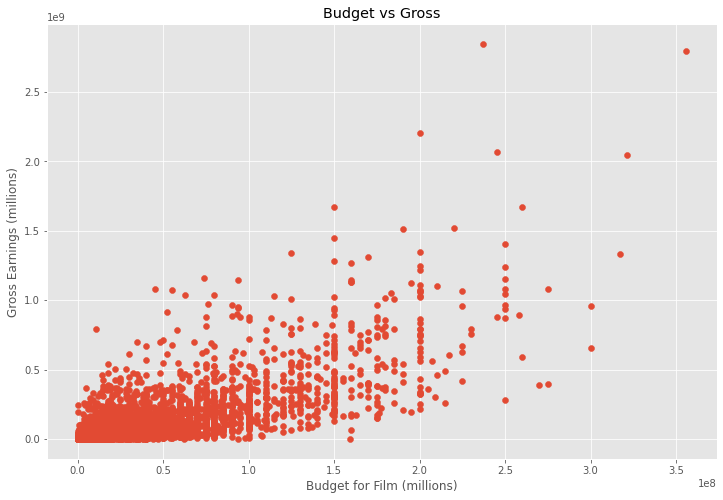

In [16]:
#Lets Check what correlation is in between budget and gross

#Lets first plot a Scatterplot for it

plt.scatter(x=df['budget'],y=df['gross'])
plt.xlabel('Budget for Film (millions)')
plt.ylabel('Gross Earnings (millions)')
plt.title('Budget vs Gross')


<AxesSubplot:xlabel='budget', ylabel='gross'>

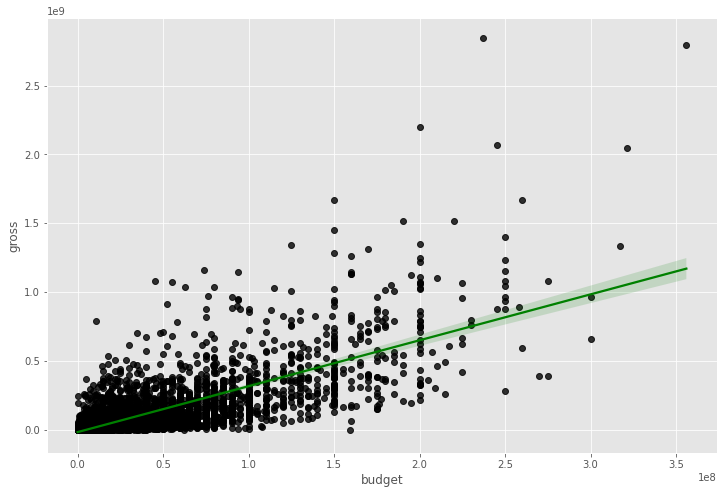

In [17]:
#Plot budget vs Gross using seaborn 
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'black'},line_kws={'color':'green'})


In [18]:
#Lets start looking at Correlation 


df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


When we look at the Correalation between Budget and Gross it is pretty high almost 0.75

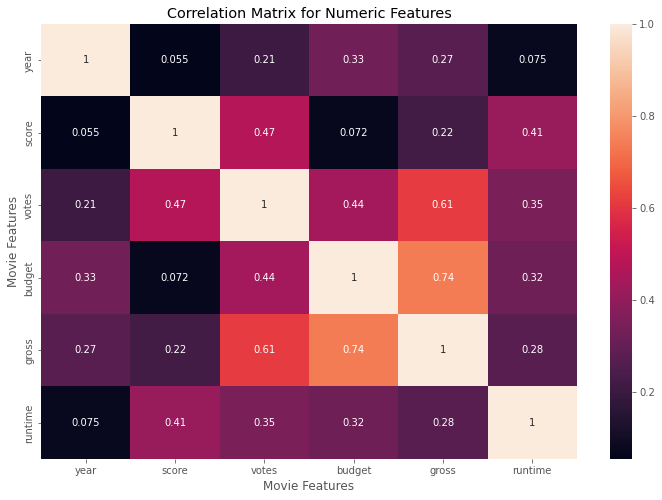

In [19]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()


In [20]:
#Lets look at Company wise 
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


Company is not numeric,Lets Convert the Object type in our df to numeric values so that we can find the Correlation with respect to each value

In [33]:
#Lets create a copy to work on
df_copy = df.copy(deep=True)

In [34]:
df_copy

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [35]:
#Lets convert the Object type to some numeric in our copied dataframe
for col_name in df_copy.columns:
    if(df_copy[col_name].dtype == 'object'):
        df_copy[col_name] = df_copy[col_name].astype('category')
        df_copy[col_name] = df_copy[col_name].cat.codes


In [36]:
df_copy

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4702,6,6,1980,1308,8.4,927000,1797,2838,699,46,19000000,46998772,1431,146,35
1,3939,6,1,1980,1131,5.8,65000,1580,1159,214,47,4500000,58853106,454,104,35
2,3651,4,0,1980,1363,8.7,1200000,759,1821,1160,47,18000000,538375067,948,124,35
3,205,4,4,1980,1131,7.7,221000,891,1415,1477,47,3500000,83453539,1113,88,35
4,734,6,4,1980,1174,7.3,108000,721,351,271,47,6000000,39846344,1088,98,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000,17,2395,1818,47,90000000,426505244,454,124,76
7649,3566,4,0,2020,715,6.5,102000,854,2314,147,47,85000000,319715683,1113,99,76
7650,1155,4,1,2020,907,5.6,53000,1811,2833,1473,47,175000000,245487753,1402,101,76
7651,3988,4,1,2020,760,6.8,42000,296,2095,640,6,135000000,111105497,12,100,76


In [30]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


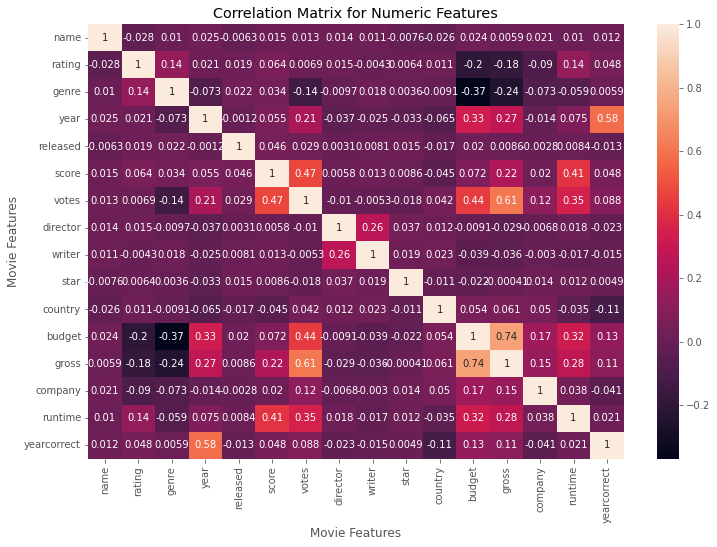

In [37]:
#Lets check correlation of every field with respect to other
correlation_matrix = df_copy.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()


In [38]:
#Lets look at the correlation in table
df_copy.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.027666,0.010247,0.024901,-0.006258,0.014785,0.012817,0.013827,0.011492,-0.007576,-0.025544,0.023586,0.005876,0.021225,0.010341,0.011595
rating,-0.027666,1.000000,0.142751,0.021310,0.018556,0.063853,0.006932,0.015318,-0.004346,0.006375,0.011052,-0.200025,-0.179145,-0.089967,0.138544,0.047646
genre,0.010247,0.142751,1.000000,-0.073368,0.021896,0.034258,-0.136313,-0.009717,0.017830,0.003617,-0.009143,-0.368763,-0.244339,-0.072928,-0.059415,0.005866
year,0.024901,0.021310,-0.073368,1.000000,-0.001200,0.055223,0.205862,-0.036908,-0.025201,-0.032861,-0.065406,0.327888,0.274434,-0.014062,0.074666,0.580236
released,-0.006258,0.018556,0.021896,-0.001200,1.000000,0.046174,0.029057,0.003140,0.008096,0.015204,-0.017232,0.020011,0.008627,-0.002787,0.008438,-0.013499
score,0.014785,0.063853,0.034258,0.055223,0.046174,1.000000,0.473687,0.005779,0.012870,0.008576,-0.045014,0.071568,0.221950,0.020461,0.414463,0.048474
votes,0.012817,0.006932,-0.136313,0.205862,0.029057,0.473687,1.000000,-0.009977,-0.005346,-0.017599,0.041844,0.439890,0.614824,0.118979,0.352322,0.088246
director,0.013827,0.015318,-0.009717,-0.036908,0.003140,0.005779,-0.009977,1.000000,0.262997,0.036809,0.011764,-0.009069,-0.029182,-0.006770,0.018369,-0.022667
writer,0.011492,-0.004346,0.017830,-0.025201,0.008096,0.012870,-0.005346,0.262997,1.000000,0.019085,0.022741,-0.039477,-0.035969,-0.003013,-0.016678,-0.015240
star,-0.007576,0.006375,0.003617,-0.032861,0.015204,0.008576,-0.017599,0.036809,0.019085,1.000000,-0.011377,-0.021857,-0.000406,0.014092,0.011700,0.004875


In [42]:
#Lets put the things in pairs
correlation_mat = df_copy.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.027666
             genre          0.010247
             year           0.024901
             released      -0.006258
                              ...   
yearcorrect  budget         0.128691
             gross          0.112999
             company       -0.041099
             runtime        0.020720
             yearcorrect    1.000000
Length: 256, dtype: float64

In [43]:
#Lets Sort the pairs
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368763
genre        budget        -0.368763
             gross         -0.244339
gross        genre         -0.244339
rating       budget        -0.200025
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [44]:
#Lets check pair that have correlation that is greater than 0.5
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

yearcorrect  year           0.580236
year         yearcorrect    0.580236
votes        gross          0.614824
gross        votes          0.614824
             budget         0.740362
budget       gross          0.740362
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

From the above Correlations we can say that Company is not significant factor to get the makers of movies a huge gross income out of it.We can say that votes and budget have highest correlation to gross earnings